In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/My Drive/data-1.xlsx"

df_train = pd.read_excel(file_path, sheet_name='Sheet1')
df_test = pd.read_excel(file_path, sheet_name='Sheet2')

X_train = df_train.iloc[:, 0].values.reshape(-1, 1)
y_train = df_train.iloc[:, 1].values
X_test = df_test.iloc[:, 0].values.reshape(-1, 1)
y_test = df_test.iloc[:, 1].values

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]


Mounted at /content/drive


LSM

y = 0.1083x + -0.6445
MSE train: 0.6194870792954702
MSE test: 0.5990294289771905


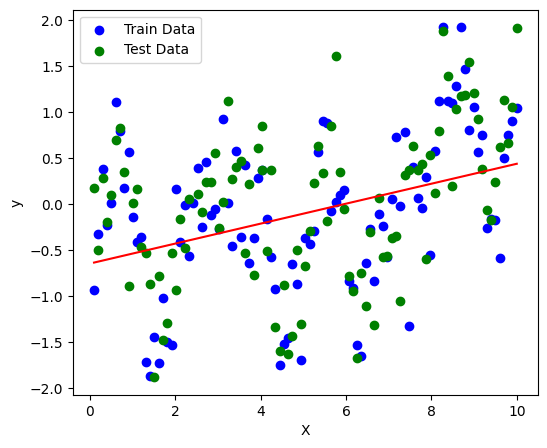

In [3]:
theta_ols = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

b = theta_ols[0]
a = theta_ols[1]

print(f"y = {a:.4f}x + {b:.4f}")

y_train_pred_ols = X_train_bias @ theta_ols
y_test_pred_ols = X_test_bias @ theta_ols

mse_train_ols = np.mean((y_train - y_train_pred_ols) ** 2)
mse_test_ols = np.mean((y_test - y_test_pred_ols) ** 2)

print("MSE train:", mse_train_ols)
print("MSE test:", mse_test_ols)

plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_train, y_train_pred_ols, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

GD

y = 0.1057x + -0.6271
MSE train: 0.6195616468839182
MSE test: 0.5982213004893514


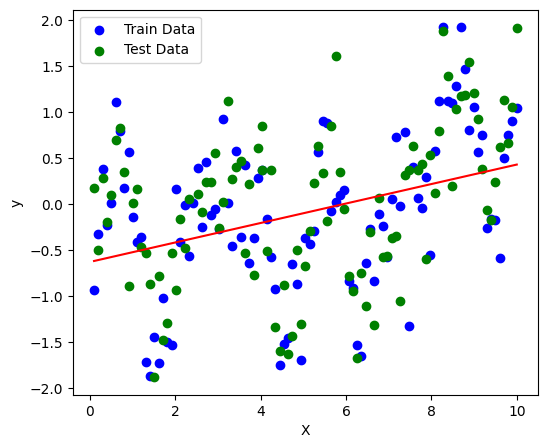

In [4]:
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradients
    return theta

theta_gd = gradient_descent(X_train_bias, y_train, alpha=0.005, epochs=3000)

b_gd = theta_gd[0]
a_gd = theta_gd[1]

print(f"y = {a_gd:.4f}x + {b_gd:.4f}")

y_train_pred_gd = X_train_bias @ theta_gd
y_test_pred_gd = X_test_bias @ theta_gd

mse_train_gd = np.mean((y_train - y_train_pred_gd) ** 2)
mse_test_gd = np.mean((y_test - y_test_pred_gd) ** 2)

print("MSE train:", mse_train_gd)
print("MSE test:", mse_test_gd)

plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_train, y_train_pred_gd, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Newton

y = 0.1083x + -0.6445
MSE train: 0.6194870792954702
MSE test: 0.5990294289771906


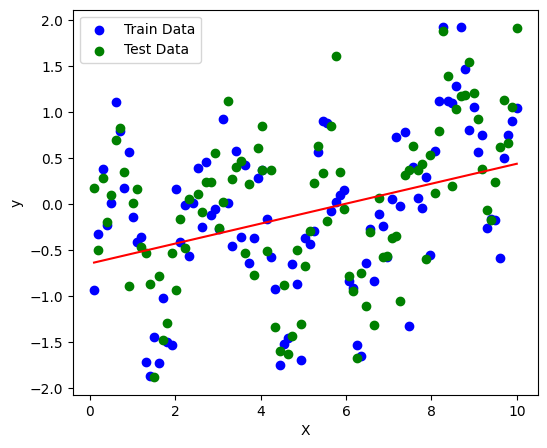

In [5]:
def newton_method(X, y, iterations=10):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        gradient = (1/m) * X.T @ (X @ theta - y)
        hessian = (1/m) * X.T @ X
        theta -= np.linalg.inv(hessian) @ gradient
    return theta

theta_newton = newton_method(X_train_bias, y_train)

b_newton = theta_newton[0]
a_newton = theta_newton[1]

print(f"y = {a_newton:.4f}x + {b_newton:.4f}")

y_train_pred_newton = X_train_bias @ theta_newton
y_test_pred_newton = X_test_bias @ theta_newton

mse_train_newton = np.mean((y_train - y_train_pred_newton) ** 2)
mse_test_newton = np.mean((y_test - y_test_pred_newton) ** 2)

print("MSE train:", mse_train_newton)
print("MSE test:", mse_test_newton)

plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_train, y_train_pred_newton, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Fourier

a0=424.4184, a1=-0.1931, b1=0.2539, a2=0.2662, b2=-0.1432, a3=-0.1430, b3=-0.0264, a4=-0.6452, b4=0.1121, c=0.0936, d=-425.0566


<ipython-input-6-2289a3a1a183>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


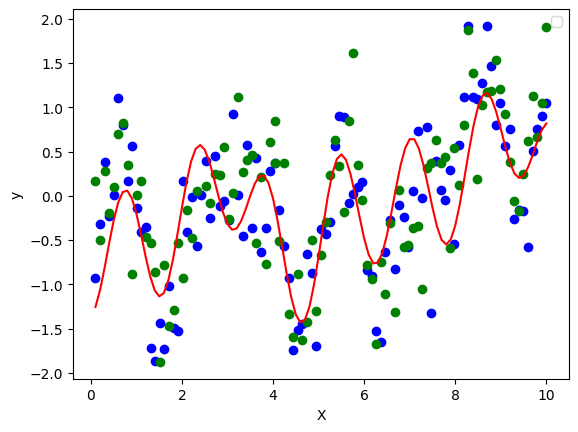

MSE train: 0.3301939889095106
MSE test: 0.4231515351615557


In [6]:
from scipy.optimize import curve_fit
X_train = np.array(X_train, dtype=float).ravel()
y_train = np.array(y_train, dtype=float).ravel()
X_test = np.array(X_test, dtype=float).ravel()
y_test = np.array(y_test, dtype=float).ravel()

def fourier_model(x, a0, a1, b1, a2, b2, a3, b3, a4, b4, c, d):
    return (a0 +
            a1 * np.cos(x) + b1 * np.sin(x) +
            a2 * np.cos(2*x) + b2 * np.sin(2*x) +
            a3 * np.cos(3*x) + b3 * np.sin(3*x) +
            a4 * np.cos(4*x) + b4 * np.sin(4*x) + c*x + d )

initial_guess = [np.mean(y_train), 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]

params, covariance = curve_fit(fourier_model, X_train, y_train, p0=initial_guess)

a0, a1, b1, a2, b2, a3, b3, a4, b4, c, d = params
print(f"a0={a0:.4f}, a1={a1:.4f}, b1={b1:.4f}, a2={a2:.4f}, b2={b2:.4f}, "
      f"a3={a3:.4f}, b3={b3:.4f}, a4={a4:.4f}, b4={b4:.4f}, c={c:.4f}, d={d:.4f}")

x_fit = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 100)
y_fit = fourier_model(x_fit, *params)

plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.plot(x_fit, y_fit, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
y_train_pred = fourier_model(X_train, *params)
y_test_pred = fourier_model(X_test, *params)
train_mse = np.mean((y_train - y_train_pred) ** 2)
test_mse = np.mean((y_test - y_test_pred) ** 2)
print("MSE train:", train_mse)
print("MSE test:", test_mse)